In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Reshape, Flatten, Lambda, Conv2DTranspose 
from keras.preprocessing import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

In [3]:
# download training and test data from mnist and reshape it

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
output_X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.astype('float32') / 255.
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
# adding some noise to data

input_x_train = output_X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_train.shape) 
input_x_test = output_X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_test.shape)

In [5]:
# creating denoising autoencoder model
inputs = Input(shape = (28,28,1))

conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)

upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(pool2)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

In [6]:
autoencoder = Model(inputs, outputs)
m = 256
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(input_x_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2148
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1492
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1405
Epoch 4/10
60000/60000 [==============================] - 58s 966us/step - loss: 0.1430
Epoch 5/10
60000/60000 [==============================] - 56s 934us/step - loss: 0.1543
Epoch 6/10
60000/60000 [==============================] - 58s 968us/step - loss: 0.1388
Epoch 7/10
60000/60000 [==============================] - 57s 958us/step - loss: 0.1336
Epoch 8/10
60000/60000 [==============================] - 58s 973us/step - loss: 0.1301
Epoch 9/10
60000/60000 [==============================] - 57s 956us/step - loss: 0.1292
Epoch 10/10
60000/60000 [==============================] - 58s 962us/step - loss: 0.1274


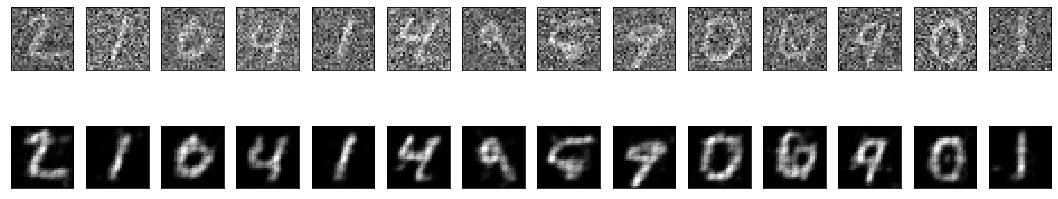

In [7]:
decoded_imgs = autoencoder.predict(input_x_test)

n = 15
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original noisy image
    ax = plt.subplot(2, n, i)
    plt.imshow(input_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display denosined image
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()